<a href="https://colab.research.google.com/github/abhayforML/Portfolio-for-Sustainability/blob/main/Case3_ESG_opt_Nifty_assigned_wts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##This is Case3 - Segregate Stocks with Low ESG risk and High ESG risks
##Assign weights within the groups as .7 : .3
##Weights are assigned in Step12 and in Column Wts
###Also compare with optimized weights

##Step0: Imports, PIP install yfinance

In [1]:
!pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
#from yahoo_fin.stock_info import *
import datetime
from datetime import datetime
import requests
import io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 555 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


##Step1: Collect data for ESG risk scores of Nifty 50 stocks
##Sort by ESG risk
##ESG Risk = ESG Rating + Controversy
###Higher the score, higher the risk (Differnt agencies give diff kind of ratings)

In [2]:
#url of project data
url = 'https://raw.githubusercontent.com/abhayforML/Portfolio-for-Sustainability/main/esg-all-v1.csv'
download = requests.get(url).content

#create esg_ratings - a df of pandas
esg_ratings = pd.read_csv(io.StringIO(download.decode('utf-8')))
#Check nulls
print(esg_ratings.isnull().sum())
print('\n')
print('Sorted_esg is stocks sorted in their ascending esg risk rating')
print('\n')
sorted_esg = esg_ratings.sort_values(by=["ESG+CONT"], ascending=True)
print(sorted_esg.index)
print('\n')
print(esg_ratings)

STOCK              0
ESG RISK RATING    0
CONTROVERSY        0
ESG+CONT           0
dtype: int64


Sorted_esg is stocks sorted in their ascending esg risk rating


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 26, 24, 25, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 47, 49],
           dtype='int64')


         STOCK  ESG RISK RATING  CONTROVERSY  ESG+CONT
0   HEROMOTOCO            12.00            1     13.00
1        TECHM            12.00            1     13.00
2        WIPRO            13.00            2     15.00
3    EICHERMOT            13.00            2     15.00
4      HCLTECH            13.00            2     15.00
5   ADANIPORTS            12.00            4     16.00
6          TCS            14.00            2     16.00
7        TITAN            15.00            2     17.00
8         INFY            15.00            2     17.00
9   BAJAJ-AUTO       

##Step2: Collect data for 50 stocks 
###Data is collected from Yfinance API for 10 years monthly Adj close
###Idea is to see portfolio optimization with and without ESG risk




In [3]:
#We can convert this to take only part of the 50 stocks e.g. [:10] for 10 stocks
top_esg = sorted_esg['STOCK'][:]
top_esg
l1=""
for stock in top_esg:
    l1 = l1+" "+stock+".NS"
data = yf.download(l1,start="2012-04-01",end='2022-04-30', interval="1mo")
data
print(type(data))

[*********************100%***********************]  50 of 50 completed
<class 'pandas.core.frame.DataFrame'>


##Take only Adj Close prices
##Save and download csv for further use for all 50 Stocks

In [4]:
#cp is the base data below
cp = data['Adj Close']
print(cp)
print(type(cp))
print(cp.columns)
print(len(cp.columns))
cp.to_csv('/content/cp.csv')

            ADANIENT.NS  ADANIPORTS.NS  APOLLOHOSP.NS  ASIANPAINT.NS  \
Date                                                                   
2012-04-01    36.382305     120.531555     601.516479     323.914093   
2012-05-01    33.740566     116.428955     639.161926     369.353699   
2012-06-01    28.800232     114.259766     589.063416     357.138580   
2012-07-01    23.426085     113.599564     601.325745     337.211578   
2012-08-01    20.175705     107.942848     603.652649     337.063446   
...                 ...            ...            ...            ...   
2021-12-01  1708.723511     725.275574    4999.718750    3358.719727   
2022-01-01  1714.221191     711.371887    4445.186523    3129.671875   
2022-02-01  1643.751221     702.632446    4789.693359    3151.911621   
2022-03-01  2013.893921     768.873596    4503.776367    3057.889893   
2022-04-01  2331.009033     850.508057    4442.194824    3214.013672   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJAJFINSV.NS  BAJFINAN

##Step3: Data Exploration : Check NaN and Nulls

In [5]:
#Use either one of the methods
#print(np.isnan(cp).sum())
#print('\n')
#print(cp.isnull().sum())
#print('\n')
print(cp.isna().sum())

ADANIENT.NS       0
ADANIPORTS.NS     0
APOLLOHOSP.NS     0
ASIANPAINT.NS     0
AXISBANK.NS       0
BAJAJ-AUTO.NS     0
BAJAJFINSV.NS     0
BAJFINANCE.NS     0
BHARTIARTL.NS     0
BPCL.NS           0
BRITANNIA.NS      0
CIPLA.NS          0
COALINDIA.NS      0
DIVISLAB.NS       0
DRREDDY.NS        0
EICHERMOT.NS      0
GRASIM.NS         0
HCLTECH.NS        0
HDFC.NS           0
HDFCBANK.NS       0
HDFCLIFE.NS      68
HEROMOTOCO.NS     0
HINDALCO.NS       0
HINDUNILVR.NS     0
ICICIBANK.NS      0
INDUSINDBK.NS     0
INFY.NS           0
ITC.NS            0
JSWSTEEL.NS       0
KOTAKBANK.NS      0
LT.NS             0
M&M.NS            0
MARUTI.NS         0
NESTLEIND.NS      0
NTPC.NS           0
ONGC.NS           0
POWERGRID.NS      0
RELIANCE.NS       0
SBILIFE.NS       67
SBIN.NS           0
SUNPHARMA.NS      0
TATACONSUM.NS     0
TATAMOTORS.NS     0
TATASTEEL.NS      0
TCS.NS            0
TECHM.NS          0
TITAN.NS          0
ULTRACEMCO.NS     0
UPL.NS            0
WIPRO.NS          0


##Step4: Data Exploration : Remove stocks with NaNs / Nulls after checking multiple values are blank for a stock

In [6]:
#Check which stocks are culprits, which is also found in the earlier results
c=0
l=[]
for i in cp.columns:
    if np.isnan(cp[i][0])==True:
        c=c+1
        l.append(i)
print(c)
print(l)
print("Need to remove these stocks")

2
['HDFCLIFE.NS', 'SBILIFE.NS']
Need to remove these stocks


In [7]:
print(cp.columns)
cp = cp.drop(columns=['HDFCLIFE.NS', 'SBILIFE.NS'])
#drop has inplace default as False so assign it to cp to get one with dropped columns
print('\n Dropped 2 stocks')
print(cp.columns)
#Save it to a new csv for future use
cp.to_csv('/content/cp.csv')
print(len(cp.columns))
print(cp.index)

Index(['ADANIENT.NS', 'ADANIPORTS.NS', 'APOLLOHOSP.NS', 'ASIANPAINT.NS',
       'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS',
       'BHARTIARTL.NS', 'BPCL.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS',
       'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS',
       'HDFC.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS',
       'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'ITC.NS',
       'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS',
       'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS',
       'SBILIFE.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'TATACONSUM.NS',
       'TATAMOTORS.NS', 'TATASTEEL.NS', 'TCS.NS', 'TECHM.NS', 'TITAN.NS',
       'ULTRACEMCO.NS', 'UPL.NS', 'WIPRO.NS'],
      dtype='object')

 Dropped 2 stocks
Index(['ADANIENT.NS', 'ADANIPORTS.NS', 'APOLLOHOSP.NS', 'ASIANPAINT.NS',
       'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS',
       'BHARTIARTL.

##Step5: Drop the Stock/s from ESG Dataframe also

In [8]:
print(esg_ratings[:])
print('Take all stocks')

         STOCK  ESG RISK RATING  CONTROVERSY  ESG+CONT
0   HEROMOTOCO            12.00            1     13.00
1        TECHM            12.00            1     13.00
2        WIPRO            13.00            2     15.00
3    EICHERMOT            13.00            2     15.00
4      HCLTECH            13.00            2     15.00
5   ADANIPORTS            12.00            4     16.00
6          TCS            14.00            2     16.00
7        TITAN            15.00            2     17.00
8         INFY            15.00            2     17.00
9   BAJAJ-AUTO            16.00            1     17.00
10    DIVISLAB            17.90            2     19.90
11  BAJFINANCE            19.49            1     20.49
12        HDFC            19.00            2     21.00
13    HDFCLIFE            20.01            1     21.01
14  BHARTIARTL            20.00            3     23.00
15   KOTAKBANK            23.00            2     25.00
16     SBILIFE            25.66            1     26.66
17   POWER

In [9]:
esg_ratings = esg_ratings[:]
print(esg_ratings.shape)
#we need to remove the same stocks from esg_ratings df
esg_ratings = esg_ratings.drop(index=[13, 16])
print(esg_ratings.shape)
esg_ratings.to_csv('/content/esg_ratings.csv')

(50, 4)
(48, 4)


##Step6: Calculate returns(monthly) from historical data for these stocks.
###So portfolio is cp (We removed 2)

In [10]:
print('\n')
print(cp.info())
#Check nulls again
#print(cp.isnull().sum())
cp_rtn = cp.pct_change().dropna()
print(cp_rtn)



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2012-04-01 to 2022-04-01
Freq: MS
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ADANIENT.NS    121 non-null    float64
 1   ADANIPORTS.NS  121 non-null    float64
 2   APOLLOHOSP.NS  121 non-null    float64
 3   ASIANPAINT.NS  121 non-null    float64
 4   AXISBANK.NS    121 non-null    float64
 5   BAJAJ-AUTO.NS  121 non-null    float64
 6   BAJAJFINSV.NS  121 non-null    float64
 7   BAJFINANCE.NS  121 non-null    float64
 8   BHARTIARTL.NS  121 non-null    float64
 9   BPCL.NS        121 non-null    float64
 10  BRITANNIA.NS   121 non-null    float64
 11  CIPLA.NS       121 non-null    float64
 12  COALINDIA.NS   121 non-null    float64
 13  DIVISLAB.NS    121 non-null    float64
 14  DRREDDY.NS     121 non-null    float64
 15  EICHERMOT.NS   121 non-null    float64
 16  GRASIM.NS      121 non-null    float64
 17  HCLTECH.NS     121 non-n

##Step7: Visualize growth of Stocks in 10 years

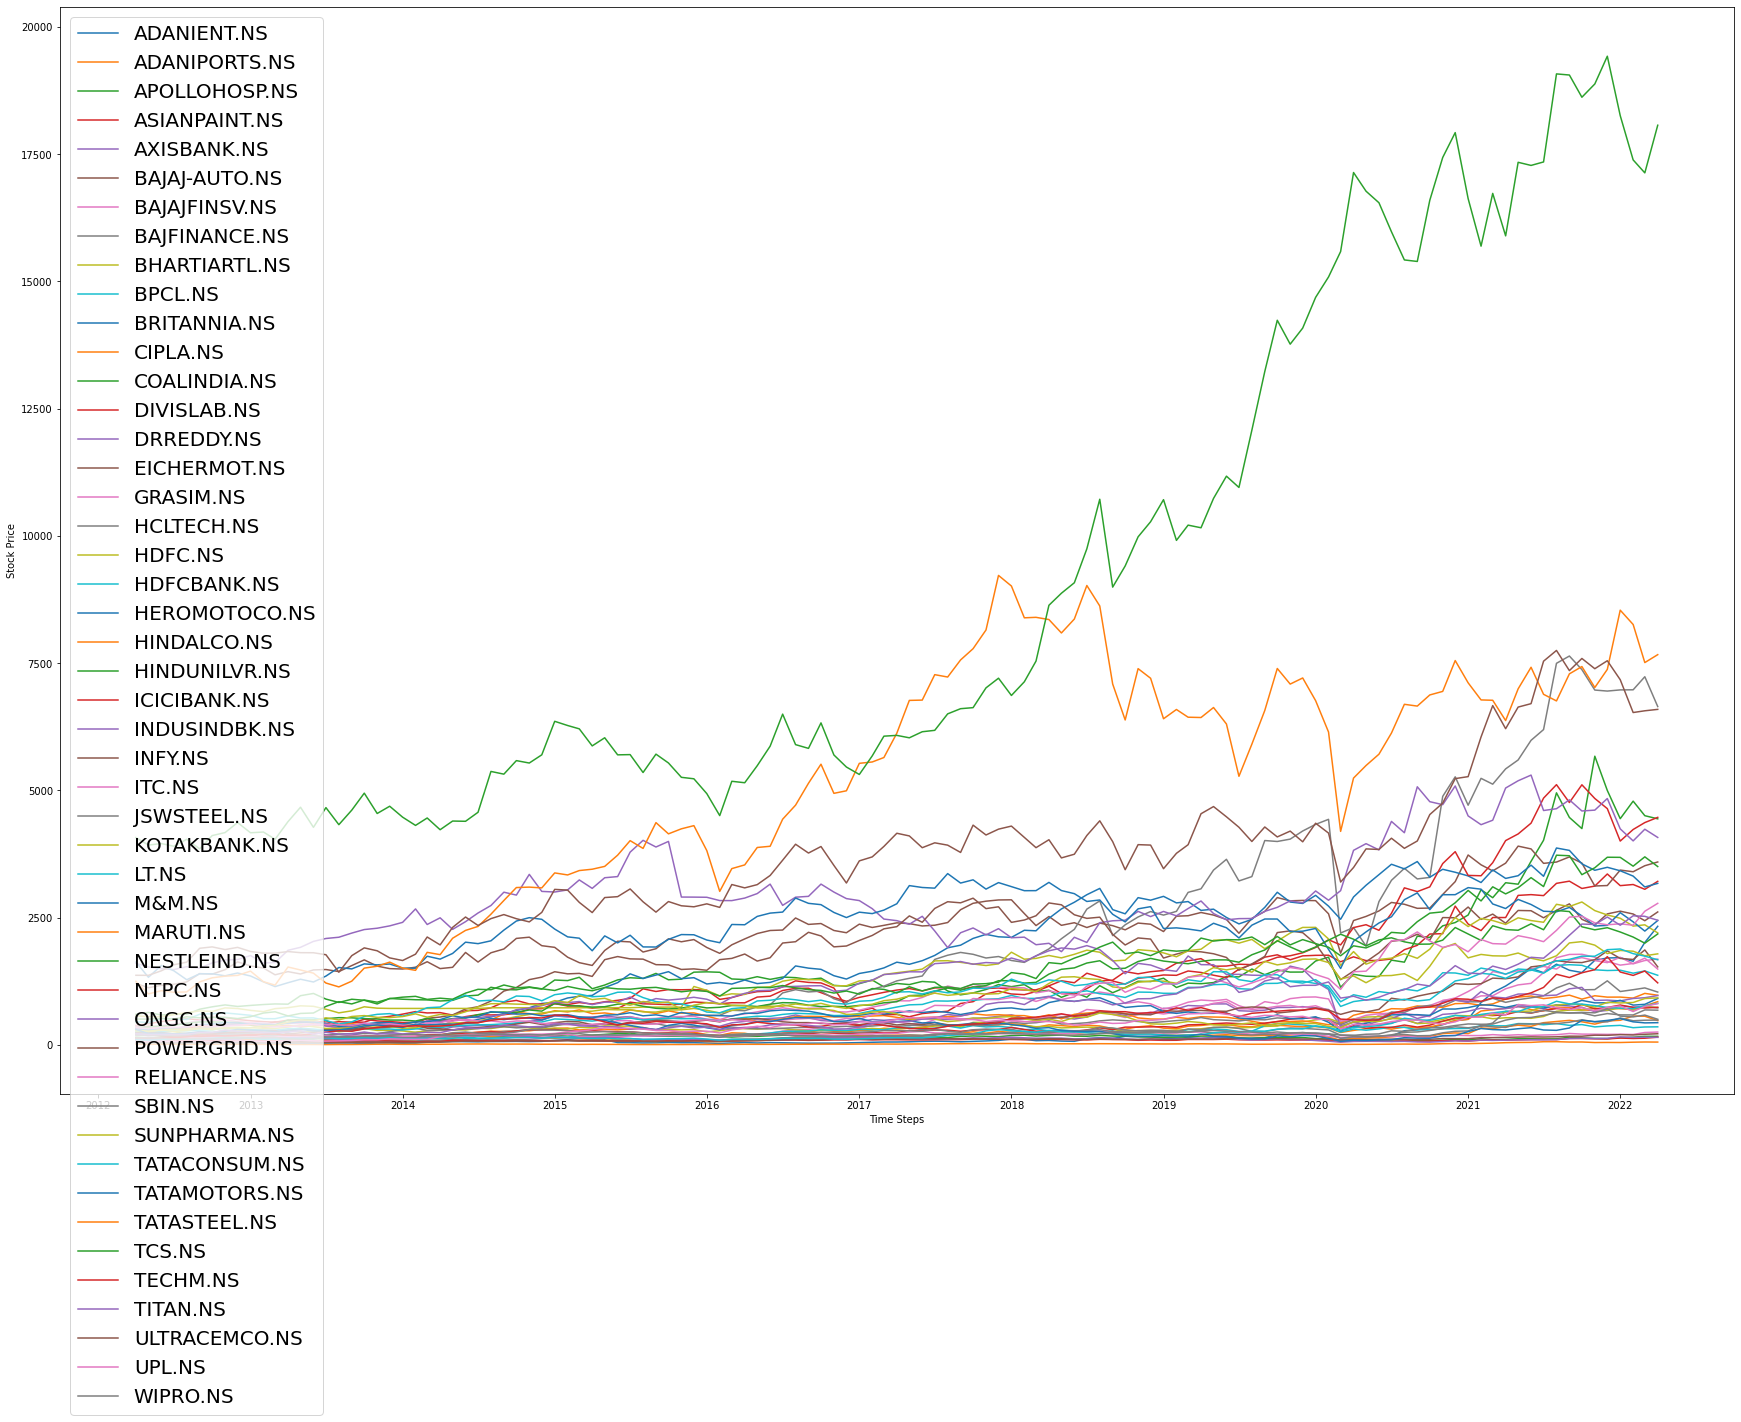

In [11]:
fig, ax = plt.subplots(figsize=(30,20))
for i in cp.columns:    
    plt.plot(cp[i])
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')
    plt.legend(cp.columns,loc=2, prop={'size': 20})
plt.show()

##Step8: Log returns are more stable, so calculate the log returns
###Annualize it

In [12]:
mthly_log_rtn = np.log(cp) - np.log(cp.shift(1))
mthly_log_rtn = mthly_log_rtn.dropna()
mthly_log_rtn

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2012-05-01,-0.075382,-0.034630,0.060704,0.131276,-0.131089,-0.072133,-0.109667,-0.028321,-0.025937,0.039470,...,-0.061812,-0.082898,-0.306443,-0.138582,-0.001003,-0.041015,-0.045213,-0.000737,-0.033653,0.012147
2012-06-01,-0.158317,-0.018807,-0.081624,-0.033631,0.045107,0.039853,0.042766,0.071603,0.008229,0.064257,...,0.114612,0.074738,0.039757,0.089516,0.025449,0.050305,0.003138,0.063041,0.128212,-0.024942
2012-07-01,-0.206533,-0.005795,0.020603,-0.057413,0.043011,0.019798,0.084378,0.128629,-0.016527,-0.023598,...,0.027612,0.091028,-0.069155,-0.063112,-0.020400,0.006754,-0.006512,0.078047,-0.048830,-0.152051
2012-08-01,-0.149371,-0.051078,0.003862,-0.000439,-0.051437,0.036844,0.069161,0.024028,-0.191327,-0.067443,...,0.022391,0.021808,0.052827,-0.108325,0.079869,0.113239,0.000610,0.032581,0.001605,0.064208
2012-09-01,0.291312,0.114113,0.151419,0.077684,0.135747,0.123675,0.110465,0.117418,0.072575,0.040529,...,0.046067,0.112464,0.132704,0.103727,-0.036258,0.202057,0.169878,0.154567,0.095994,0.049630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,0.027639,0.065717,-0.126201,0.073364,0.034331,0.002758,-0.049419,-0.002855,-0.062979,0.052570,...,0.115303,-0.046196,0.050595,0.036886,0.057587,0.159703,0.060003,0.020939,0.091609,0.115610
2022-01-01,0.003212,-0.019356,-0.117560,-0.070632,0.130386,0.092642,-0.044664,0.003284,0.064420,0.029651,...,-0.013332,-0.021962,0.070719,-0.023579,-0.000562,-0.191157,-0.066422,-0.050614,0.038598,-0.222585
2022-02-01,-0.041978,-0.012361,0.074645,0.007081,-0.040456,-0.009669,0.020378,0.000293,-0.060479,-0.126701,...,0.011201,-0.012034,-0.131285,0.117379,-0.048197,-0.047777,0.075951,-0.094162,-0.154333,-0.028152


In [13]:
avg_mthly_log_rtn = mthly_log_rtn.mean()            #Avg of 10 years
avg_mthly_log_rtn
ann_rtn = avg_mthly_log_rtn*12
ann_rtn                                             #Based on monthly avg rtn of 10 years 
print(ann_rtn.index)

Index(['ADANIENT.NS', 'ADANIPORTS.NS', 'APOLLOHOSP.NS', 'ASIANPAINT.NS',
       'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS',
       'BHARTIARTL.NS', 'BPCL.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS',
       'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS',
       'HDFC.NS', 'HDFCBANK.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS',
       'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'ITC.NS',
       'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS',
       'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS',
       'SBIN.NS', 'SUNPHARMA.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS',
       'TATASTEEL.NS', 'TCS.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS',
       'UPL.NS', 'WIPRO.NS'],
      dtype='object')


##Step9: Calculate Annual Variance, SD and then Covariance

In [14]:
mthly_rtn_var = mthly_log_rtn.var(ddof=0) # ddof=0 for population, ddof = 1 for sample
ann_rtn_var = mthly_rtn_var*12         # monthly to annual conversion
ann_rtn_sd = np.sqrt(ann_rtn_var)
print(ann_rtn_var.index)
print(ann_rtn_sd.index)

Index(['ADANIENT.NS', 'ADANIPORTS.NS', 'APOLLOHOSP.NS', 'ASIANPAINT.NS',
       'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS',
       'BHARTIARTL.NS', 'BPCL.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS',
       'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS',
       'HDFC.NS', 'HDFCBANK.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS',
       'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'ITC.NS',
       'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS',
       'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS',
       'SBIN.NS', 'SUNPHARMA.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS',
       'TATASTEEL.NS', 'TCS.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS',
       'UPL.NS', 'WIPRO.NS'],
      dtype='object')
Index(['ADANIENT.NS', 'ADANIPORTS.NS', 'APOLLOHOSP.NS', 'ASIANPAINT.NS',
       'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS',
       'BHARTIARTL.NS', 'BPCL.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COA

In [15]:
cov_matrix_mthly = mthly_log_rtn.cov(ddof=0) # ddof=0 for population, ddof = 1 for sample
cov_matrix_mthly
cov_matrix_ann = cov_matrix_mthly*12
cov_matrix_ann


,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
ADANIENT.NS,0.353754,0.101051,0.043226,0.030397,0.103063,0.032662,0.078766,0.064332,0.040286,0.054526,...,0.017508,0.073617,0.105284,0.098358,0.006982,0.052452,0.064630,0.056556,0.064661,0.016032
ADANIPORTS.NS,0.101051,0.104549,0.020783,0.017616,0.060676,0.032352,0.064320,0.061095,0.027885,0.053655,...,0.011204,0.031673,0.064402,0.061399,0.006536,0.011792,0.029889,0.050002,0.045123,-0.001513
APOLLOHOSP.NS,0.043226,0.020783,0.115108,0.012494,0.040004,0.022922,0.036894,0.056728,0.018655,0.014119,...,0.025744,0.024471,0.032237,0.008366,0.013624,0.018945,0.026722,0.025665,0.016910,0.021365
ASIANPAINT.NS,0.030397,0.017616,0.012494,0.058086,0.026389,0.012797,0.019963,0.027234,0.015894,0.030208,...,0.007034,0.022258,0.010307,0.002310,0.009696,0.012620,0.027766,0.027371,0.015964,0.010438
AXISBANK.NS,0.103063,0.060676,0.040004,0.026389,0.132301,0.053673,0.081828,0.098669,0.038638,0.074236,...,0.014976,0.043350,0.097413,0.067187,0.005880,0.030878,0.051940,0.048542,0.066143,-0.000034
BAJAJ-AUTO.NS,0.032662,0.032352,0.022922,0.012797,0.053673,0.071732,0.045315,0.045401,0.027978,0.045544,...,0.020519,0.037449,0.073181,0.038450,0.011948,0.018452,0.027167,0.035373,0.040719,0.007350
BAJAJFINSV.NS,0.078766,0.064320,0.036894,0.019963,0.081828,0.045315,0.156270,0.124660,0.035223,0.065097,...,0.009011,0.045753,0.079461,0.072540,0.005512,0.038370,0.056221,0.050220,0.049352,0.013659
BAJFINANCE.NS,0.064332,0.061095,0.056728,0.027234,0.098669,0.045401,0.124660,0.166721,0.035862,0.062239,...,0.009406,0.039043,0.079269,0.066692,0.003558,0.026400,0.061688,0.051257,0.054965,-0.000064
BHARTIARTL.NS,0.040286,0.027885,0.018655,0.015894,0.038638,0.027978,0.035223,0.035862,0.082602,0.040097,...,0.017062,0.039036,0.034856,0.023586,0.005421,-0.001482,0.025453,0.030892,0.023710,0.005519
BPCL.NS,0.054526,0.053655,0.014119,0.030208,0.074236,0.045544,0.065097,0.062239,0.040097,0.119654,...,0.004121,0.037891,0.067108,0.040543,0.000279,0.010630,0.036330,0.050885,0.056483,0.001508


##Step10: Assign equal weight for now, also get ready with ESG wts
###Make a PORTFOLIO df and add Rtn, Wts

In [16]:
PORTFOLIO = pd.DataFrame()
PORTFOLIO['Rtn'] = ann_rtn
PORTFOLIO['SD'] = ann_rtn_sd
PORTFOLIO

,Rtn,SD
ADANIENT.NS,0.415997,0.594772
ADANIPORTS.NS,0.195392,0.323341
APOLLOHOSP.NS,0.199945,0.339275
ASIANPAINT.NS,0.229480,0.241011
AXISBANK.NS,0.125966,0.363731
BAJAJ-AUTO.NS,0.108972,0.267828
BAJAJFINSV.NS,0.304242,0.395310
BAJFINANCE.NS,0.441265,0.408315
BHARTIARTL.NS,0.100467,0.287406
BPCL.NS,0.169752,0.345911


##Step10A: Assign .6 total weight for Low ESG (<25 score) and .4 total for High ESG score

In [17]:
equal_weights = [1/ann_rtn.shape[0] for i in range(ann_rtn.shape[0])]
PORTFOLIO['Wts'] = pd.Series(equal_weights, index=ann_rtn.index)
PORTFOLIO

,Rtn,SD,Wts
ADANIENT.NS,0.415997,0.594772,0.020833
ADANIPORTS.NS,0.195392,0.323341,0.020833
APOLLOHOSP.NS,0.199945,0.339275,0.020833
ASIANPAINT.NS,0.229480,0.241011,0.020833
AXISBANK.NS,0.125966,0.363731,0.020833
BAJAJ-AUTO.NS,0.108972,0.267828,0.020833
BAJAJFINSV.NS,0.304242,0.395310,0.020833
BAJFINANCE.NS,0.441265,0.408315,0.020833
BHARTIARTL.NS,0.100467,0.287406,0.020833
BPCL.NS,0.169752,0.345911,0.020833


##Step11: Add ESG Risk from esg_ratings
###Note the index...its diff
###Note '.NS' absence

In [18]:
esg_ratings

,STOCK,ESG RISK RATING,CONTROVERSY,ESG+CONT
0,HEROMOTOCO,12.00,1,13.00
1,TECHM,12.00,1,13.00
2,WIPRO,13.00,2,15.00
3,EICHERMOT,13.00,2,15.00
4,HCLTECH,13.00,2,15.00
5,ADANIPORTS,12.00,4,16.00
6,TCS,14.00,2,16.00
7,TITAN,15.00,2,17.00
8,INFY,15.00,2,17.00
9,BAJAJ-AUTO,16.00,1,17.00


In [19]:
esg_ratings['STOCK'] = esg_ratings['STOCK'] + '.NS'
print(esg_ratings)

            STOCK  ESG RISK RATING  CONTROVERSY  ESG+CONT
0   HEROMOTOCO.NS            12.00            1     13.00
1        TECHM.NS            12.00            1     13.00
2        WIPRO.NS            13.00            2     15.00
3    EICHERMOT.NS            13.00            2     15.00
4      HCLTECH.NS            13.00            2     15.00
5   ADANIPORTS.NS            12.00            4     16.00
6          TCS.NS            14.00            2     16.00
7        TITAN.NS            15.00            2     17.00
8         INFY.NS            15.00            2     17.00
9   BAJAJ-AUTO.NS            16.00            1     17.00
10    DIVISLAB.NS            17.90            2     19.90
11  BAJFINANCE.NS            19.49            1     20.49
12        HDFC.NS            19.00            2     21.00
14  BHARTIARTL.NS            20.00            3     23.00
15   KOTAKBANK.NS            23.00            2     25.00
17   POWERGRID.NS            26.49            1     27.49
18   BRITANNIA

##Step12: Change index of esg_ratings
###This step can only run once
###Assign 70% weights to Low ESG risk and 30% weights to High ESG risks

In [20]:
esg_ratings = esg_ratings.set_index('STOCK')
PORTFOLIO = PORTFOLIO.loc[esg_ratings.index]
PORTFOLIO['ESG_risk'] = esg_ratings['ESG+CONT']
PORTFOLIO[PORTFOLIO['ESG_risk'] <= 25]
PORTFOLIO.shape
PORTFOLIO['Wts'] = PORTFOLIO['ESG_risk'].apply(lambda x: .7/15 if (x <= 25) else .3/33)
PORTFOLIO

,Rtn,SD,Wts,ESG_risk
STOCK,,,,
HEROMOTOCO.NS,0.040602,0.279736,0.046667,13.00
TECHM.NS,0.215725,0.299147,0.046667,13.00
WIPRO.NS,0.130310,0.269552,0.046667,15.00
EICHERMOT.NS,0.257336,0.316147,0.046667,15.00
HCLTECH.NS,0.230843,0.264621,0.046667,15.00
ADANIPORTS.NS,0.195392,0.323341,0.046667,16.00
TCS.NS,0.193025,0.228208,0.046667,16.00
TITAN.NS,0.242022,0.323185,0.046667,17.00
INFY.NS,0.185790,0.267107,0.046667,17.00


In [21]:
PORTFOLIO['Wts'].sum()

1.0

##Step13: Move towards Sharpe's ratio and portfolio Rtn and SD
###ESG Multiplier = reciprocal of ESG Risk. Convert it to ESG Wts
###ESG Wts = ESG Multiplier / sum(ESG Multiplier)
###So Total of ESG Wts is 1

In [22]:
esg_risk = esg_ratings['ESG+CONT'].to_list()
print('Original ESG risk : ', esg_risk)
esg_multiplier = list(map(lambda x:round((1/x),4), esg_risk))
print('ESG multiplier : ', esg_multiplier)
multipler_sum = 0
multipler_sum = sum(esg_multiplier)
print('Total of Multiplier : ', multipler_sum)
esg_wt = list(map(lambda x:x/multipler_sum, esg_multiplier))
print('ESG Wts : ', esg_wt)
print('Total of ESG Wts : ', sum(esg_wt))
PORTFOLIO['ESG_Multiplier'] = pd.Series(esg_multiplier, index=esg_ratings.index)
PORTFOLIO['ESG_Wts'] = pd.Series(esg_wt, index=esg_ratings.index)
PORTFOLIO

Original ESG risk :  [13.0, 13.0, 15.0, 15.0, 15.0, 16.0, 16.0, 17.0, 17.0, 17.0, 19.9, 20.49, 21.0, 23.0, 25.0, 27.49, 27.74, 28.0, 28.0, 28.0, 28.0, 29.0, 30.0, 30.0, 30.0, 30.22, 30.24, 32.0, 32.0, 32.0, 32.75, 33.0, 33.0, 33.45, 35.0, 36.0, 37.0, 37.0, 38.0, 38.0, 39.0, 39.0, 39.0, 41.0, 41.41, 45.0, 45.0, 60.0]
ESG multiplier :  [0.0769, 0.0769, 0.0667, 0.0667, 0.0667, 0.0625, 0.0625, 0.0588, 0.0588, 0.0588, 0.0503, 0.0488, 0.0476, 0.0435, 0.04, 0.0364, 0.036, 0.0357, 0.0357, 0.0357, 0.0357, 0.0345, 0.0333, 0.0333, 0.0333, 0.0331, 0.0331, 0.0312, 0.0312, 0.0312, 0.0305, 0.0303, 0.0303, 0.0299, 0.0286, 0.0278, 0.027, 0.027, 0.0263, 0.0263, 0.0256, 0.0256, 0.0256, 0.0244, 0.0241, 0.0222, 0.0222, 0.0167]
Total of Multiplier :  1.8652999999999997
ESG Wts :  [0.041226612341178366, 0.041226612341178366, 0.035758323057953144, 0.035758323057953144, 0.035758323057953144, 0.033506674529566294, 0.033506674529566294, 0.03152307939741597, 0.03152307939741597, 0.03152307939741597, 0.02696617166

,Rtn,SD,Wts,ESG_risk,ESG_Multiplier,ESG_Wts
STOCK,,,,,,
HEROMOTOCO.NS,0.040602,0.279736,0.046667,13.00,0.0769,0.041227
TECHM.NS,0.215725,0.299147,0.046667,13.00,0.0769,0.041227
WIPRO.NS,0.130310,0.269552,0.046667,15.00,0.0667,0.035758
EICHERMOT.NS,0.257336,0.316147,0.046667,15.00,0.0667,0.035758
HCLTECH.NS,0.230843,0.264621,0.046667,15.00,0.0667,0.035758
ADANIPORTS.NS,0.195392,0.323341,0.046667,16.00,0.0625,0.033507
TCS.NS,0.193025,0.228208,0.046667,16.00,0.0625,0.033507
TITAN.NS,0.242022,0.323185,0.046667,17.00,0.0588,0.031523
INFY.NS,0.185790,0.267107,0.046667,17.00,0.0588,0.031523


##Step14: Calculation of Portfolio Return and Risk for equal weights

In [23]:
Rtn_portfolio = np.dot((PORTFOLIO['Wts'].values).T, PORTFOLIO['Rtn'].values)
print(Rtn_portfolio*100)
SD_portfolio = np.sqrt(np.dot((PORTFOLIO['Wts'].values).T, np.dot(cov_matrix_ann.values, PORTFOLIO['Wts'].values)))
print(SD_portfolio*100)

18.252838937662624
17.933520915294288


##Step15: Calculation of Portfolio Return and Risk with ESG weights

In [24]:
Rtn_portfolio_esg = np.dot((PORTFOLIO['ESG_Wts'].values).T, PORTFOLIO['Rtn'].values)
print(Rtn_portfolio_esg*100)
SD_portfolio_esg = np.sqrt(np.dot((PORTFOLIO['ESG_Wts'].values).T, np.dot(cov_matrix_ann.values, PORTFOLIO['ESG_Wts'].values)))
print(SD_portfolio_esg*100)

17.44421893832941
18.36269814324279


###Important Comment: There is a difference of .5% between Portfolio Returns with or without ESG Wts. Using ESG Wts is good.

##Step16: Optimize Sharpe ratio with or without ESG
###Optimization Solver will always give the same best weights
###We don't need to run it twice

In [25]:
import scipy
from scipy.optimize import minimize, Bounds
# objective function for Optimization
def sharpe_ratio(weights, covar_matrix, annual_returns, Rf=0.0588, sign=-1.0):
  std = np.sqrt(np.dot(np.dot(weights.T, covar_matrix), weights))
  mean = np.dot(weights.T, annual_returns)
  sharpe = (mean - Rf)/std
  return sign*sharpe # multiplied by -1 because scipy don't have maximize function

def constraint(weights):
  return weights.sum() - 1

cons = [{'type': 'eq', 'fun': constraint}]
bnds = Bounds(np.zeros(48),np.ones(48))

#Start with Equal weights - Call the function here
sol = minimize(sharpe_ratio, equal_weights, args=(cov_matrix_ann.values, ann_rtn.values), method='SLSQP', constraints=cons, bounds=bnds)
sol

np.round_(sol.x, decimals=4)
print(np.round_(sol.x, decimals=4))

[0.0593 0.     0.     0.0767 0.     0.     0.     0.1366 0.     0.
 0.1603 0.     0.     0.1789 0.     0.     0.     0.0847 0.     0.
 0.     0.     0.137  0.     0.     0.031  0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.0294 0.     0.     0.
 0.     0.     0.1062 0.     0.     0.     0.     0.    ]


###Step17: Optimized Sharpe ratio with weights

In [26]:
PORTFOLIO['Opt_wt'] = pd.Series(np.round_(sol.x, decimals=4), index=esg_ratings.index)
PORTFOLIO[['Rtn', 'SD', 'ESG_Wts', 'Opt_wt']]

,Rtn,SD,ESG_Wts,Opt_wt
STOCK,,,,
HEROMOTOCO.NS,0.040602,0.279736,0.041227,0.0593
TECHM.NS,0.215725,0.299147,0.041227,0.0000
WIPRO.NS,0.130310,0.269552,0.035758,0.0000
EICHERMOT.NS,0.257336,0.316147,0.035758,0.0767
HCLTECH.NS,0.230843,0.264621,0.035758,0.0000
ADANIPORTS.NS,0.195392,0.323341,0.033507,0.0000
TCS.NS,0.193025,0.228208,0.033507,0.0000
TITAN.NS,0.242022,0.323185,0.031523,0.1366
INFY.NS,0.185790,0.267107,0.031523,0.0000


##Step18: Result Case3

In [27]:
# Use Optimized weights now
wi = np.array(PORTFOLIO['Opt_wt'])
rtn = np.array(PORTFOLIO['Rtn'])
Sharpe_opt = sharpe_ratio(wi, cov_matrix_ann.values, rtn, sign=1.0)

# Use ESG weights now
wi = np.array(PORTFOLIO['ESG_Wts'])
rtn = np.array(PORTFOLIO['Rtn'])
Sharpe_ESG = sharpe_ratio(wi, cov_matrix_ann.values, rtn, sign=1.0)

# Use Optimized weights now
wi = np.array(PORTFOLIO['Wts'])
rtn = np.array(PORTFOLIO['Rtn'])
Sharpe_Assigned_Wts = sharpe_ratio(wi, cov_matrix_ann.values, rtn, sign=1.0)

In [28]:
print('Result of Case3 - Assigning 0.7:0.3 Weights to Low and High ESG risk Stocks')
print('------------------------------------------------------------------------------------------------------------')
Rtn_portfolio_opt_wt = np.dot((PORTFOLIO['Opt_wt'].values).T, PORTFOLIO['Rtn'].values)
print('Nifty Portfolio Rtn using Opt wts       = {0:8.4f}%'.format(Rtn_portfolio_opt_wt*100))
SD_portfolio_opt_wt = np.sqrt(np.dot((PORTFOLIO['Opt_wt'].values).T, np.dot(cov_matrix_ann.values, PORTFOLIO['Opt_wt'].values)))
print('Nifty Portfolio SD using Opt wts        = {0:8.4f}%'.format(SD_portfolio_opt_wt*100))
print('Sharpe ratio from optimized wts         = {0:8.4f}'.format(Sharpe_opt))
print('This is the optimum portfolio')
print('\n')
Rtn_portfolio_esg_wt = np.dot((PORTFOLIO['ESG_Wts'].values).T, PORTFOLIO['Rtn'].values)
print('Nifty Portfolio Rtn using ESG Wts       = {0:8.4f}%'.format(Rtn_portfolio_esg_wt*100))
SD_portfolio_esg_wt = np.sqrt(np.dot((PORTFOLIO['ESG_Wts'].values).T, np.dot(cov_matrix_ann.values, PORTFOLIO['ESG_Wts'].values)))
print('Nifty Portfolio SD using ESG Wts        = {0:8.4f}%'.format(SD_portfolio_esg_wt*100))
print('Sharpe ratio from ESG wts               = {0:8.4f}'.format(Sharpe_ESG))
print('\n')
Rtn_portfolio_assigned_wt = np.dot((PORTFOLIO['Wts'].values).T, PORTFOLIO['Rtn'].values)
print('Nifty Portfolio Rtn using Assigned Wts  = {0:8.4f}%'.format(Rtn_portfolio_assigned_wt*100))
SD_portfolio_assigned_wt = np.sqrt(np.dot((PORTFOLIO['Wts'].values).T, np.dot(cov_matrix_ann.values, PORTFOLIO['Wts'].values)))
print('Nifty Portfolio SD using Assigned Wts   = {0:8.4f}%'.format(SD_portfolio_assigned_wt*100))
print('Sharpe ratio from Assigned Wts          = {0:8.4f}'.format(Sharpe_Assigned_Wts))
print('------------------------------------------------------------------------------------------------------------')

Result of Case3 - Assigning 0.7:0.3 Weights to Low and High ESG risk Stocks
------------------------------------------------------------------------------------------------------------
Nifty Portfolio Rtn using Opt wts       =  19.1281%
Nifty Portfolio SD using Opt wts        =  15.3036%
Sharpe ratio from optimized wts         =   0.8657
This is the optimum portfolio


Nifty Portfolio Rtn using ESG Wts       =  17.4442%
Nifty Portfolio SD using ESG Wts        =  18.3627%
Sharpe ratio from ESG wts               =   0.6298


Nifty Portfolio Rtn using Assigned Wts  =  18.2528%
Nifty Portfolio SD using Assigned Wts   =  17.9335%
Sharpe ratio from Assigned Wts          =   0.6899
------------------------------------------------------------------------------------------------------------
